In [95]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical


!wget https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.test.csv
!wget https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.train.csv
train_df = pd.read_csv("titanic.train.csv")
test_df = pd.read_csv("titanic.test.csv")
train_df

--2023-11-22 01:27:19--  https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.test.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35145 (34K) [text/csv]
Saving to: ‘titanic.test.csv.10’

titanic.test.csv.10 100%[===================>]  34.32K  --.-KB/s    in 0.02s   

2023-11-22 01:27:19 (1.50 MB/s) - ‘titanic.test.csv.10’ saved [35145/35145]

--2023-11-22 01:27:19--  https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.train.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73203 (71K) [text/csv]
Saving to: ‘titanic.train.csv.10’

titanic.train.csv.1 100%[===================>]  71.49K  --.-KB/s    in 0.07s   

2023-11-2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S,11,NaN,NaN
1,2,1,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,NaN,S,11,NaN,"Plymouth, Devon / Detroit, MI"
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,8,NaN,"Isleworth, England"
3,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI"
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.9500,NaN,Q,15,NaN,"Co Athlone, Ireland New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,"Hays, Mr. Charles Melville",male,55.0,1,1,12749,93.5000,B69,S,NaN,307.0,"Montreal, PQ"
887,3,1,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,15,NaN,NaN
888,3,0,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,NaN,NaN,NaN
889,3,0,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,32.0,NaN


In [78]:
test_df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
1,1,3,0,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,"Salo, Finland Astoria, OR"
2,2,3,0,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S,"England Albion, NY"
3,3,1,1,"Schabert, Mrs. Paul (Emma Mock)",female,35.0,1,0,13236,57.7500,C28,C,"New York, NY"
4,4,1,0,"Rosenshine, Mr. George (""Mr George Thorne"")",male,46.0,0,0,PC 17585,79.2000,NaN,C,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,3,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Lower Clapton, Middlesex or Erdington, Birmingham"
414,414,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S,"Bryn Mawr, PA"
415,415,3,0,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,NaN
416,416,1,0,"Lindeberg-Lind, Mr. Erik Gustaf (""Mr Edward Li...",male,42.0,0,0,17475,26.5500,NaN,S,"Stockholm, Sweden"


In [79]:
train_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [80]:
test_df.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'home.dest'],
      dtype='object')

Find features with higher accuracies.

In [81]:
# Finding accuracy of pclass
X_train_pclass = train_df['pclass']
y_train = train_df['survived']
X_test_pclass = test_df['pclass']
y_test = test_df['survived']
# Reshape 'age' data
X_train_pclass = X_train_pclass.values.reshape(-1, 1)
X_test_pclass = X_test_pclass.values.reshape(-1, 1)
# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_pclass, y_train)
predictions_pclass = model.predict(X_test_pclass)
accuracy_pclass = accuracy_score(y_test, predictions_pclass)
print(f"Accuracy of 'pclass': {accuracy_pclass:.2f}")

# Finding accuracy of age
X_train_age = train_df['age']
X_test_age = test_df['age']
# Fill in the NaN value with median
X_train_age.fillna(X_train_age.median(), inplace=True)
X_test_age.fillna(X_test_age.median(), inplace=True)
# Reshape 'age' data
X_train_age = X_train_age.values.reshape(-1, 1)
X_test_age = X_test_age.values.reshape(-1, 1)
# Train logistic regression model
model.fit(X_train_age, y_train)
predictions_age = model.predict(X_test_age)
accuracy_age = accuracy_score(y_test, predictions_age)
print(f"Accuracy of 'age': {accuracy_age:.2f}")

# Finding accuracy of sex
X_train_sex = train_df['sex']
X_test_sex = test_df['sex']
# Replace 'male' with 1 and 'female' with 0
X_train_sex = X_train_sex.replace({'male': 1, 'female': 0})
X_test_sex = X_test_sex.replace({'male': 1, 'female': 0})
# Reshape 'age' data
X_train_sex = X_train_sex.values.reshape(-1, 1)
X_test_sex = X_test_sex.values.reshape(-1, 1)
# Train logistic regression model
model.fit(X_train_sex, y_train)
predictions_sex = model.predict(X_test_sex)
accuracy_sex = accuracy_score(y_test, predictions_sex)
print(f"Accuracy of 'sex': {accuracy_sex:.2f}")

# Finding accuracy of sibsp
X_train_sibsp = train_df['sibsp']
X_test_sibsp = test_df['sibsp']
# Reshape 'sibsp' data
X_train_sibsp = X_train_sibsp.values.reshape(-1, 1)
X_test_sibsp = X_test_sibsp.values.reshape(-1, 1)
# Train logistic regression model
model.fit(X_train_sibsp, y_train)
predictions_sibsp = model.predict(X_test_sibsp)
accuracy_sibsp = accuracy_score(y_test, predictions_sibsp)
print(f"Accuracy of 'sibsp': {accuracy_sibsp:.2f}")

# Finding accuracy of parch
X_train_parch = train_df['parch']
X_test_parch = test_df['parch']
# Reshape 'parch' data
X_train_parch = X_train_parch.values.reshape(-1, 1)
X_test_parch = X_test_parch.values.reshape(-1, 1)
# Train logistic regression model
model.fit(X_train_parch, y_train)
predictions_parch = model.predict(X_test_parch)
accuracy_parch = accuracy_score(y_test, predictions_parch)
print(f"Accuracy of 'parch': {accuracy_parch:.2f}")

# # Finding accuracy of fare
# X_train_fare = train_df['fare']
# X_test_fare = test_df['fare']
# y_train_fare = y_train
# # Handle missing values by dropping them
# X_train_fare = X_train_fare.dropna()
# index_to_drop = y_train_fare.sample(1).index
# y_train_fare.drop(index_to_drop, inplace=True)
# # Reshape 'fare' data
# X_train_fare = X_train_fare.values.reshape(-1, 1)
# X_test_fare = X_test_fare.values.reshape(-1, 1)
# # Train logistic regression model
# model.fit(X_train_fare, y_train)
# predictions_fare = model.predict(X_test_fare)
# accuracy_fare = accuracy_score(y_test, predictions_fare)
# print(f"Accuracy of 'fare': {accuracy_fare:.2f}")

# # Finding accuracy of embarked
# y_train_embark = y_train
# y_test_embark = y_test
# X_train_embarked = train_df['embarked']
# X_test_embarked = test_df['embarked']
# # Replace embarked string with numerical value
# X_train_embarked = X_train_embarked.replace({'S': 0, 'Q': 1, 'C': 2})
# X_test_embarked = X_test_embarked.replace({'S': 0, 'Q': 1, 'C': 2})
# # Handle missing values by dropping them
# X_train_embarked = X_train_embarked.dropna()
# X_test_embarked = X_test_embarked.dropna()
# # Balance number of train and test
# index_to_drop = X_test_embarked.sample(1).index
# X_test_embarked.drop(index_to_drop, inplace=True)
# index_to_drop = y_train_embark.sample(1).index
# y_train_embark.drop(index_to_drop, inplace=True)
# index_to_drop = y_test_embark.sample(2).index
# y_test_embark.drop(index_to_drop, inplace=True)
# # Reshape 'embarked' data
# X_train_embarked = X_train_embarked.values.reshape(-1, 1)
# X_test_embarked = X_test_embarked.values.reshape(-1, 1)
# # Train logistic regression model
# model.fit(X_train_embarked, y_train_embark)
# predictions_embarked = model.predict(X_test_embarked)
# accuracy_embarked = accuracy_score(y_test_embark, predictions_embarked)
# print(f"Accuracy of 'embarked': {accuracy_embarked:.2f}")

Accuracy of 'pclass': 0.67
Accuracy of 'age': 0.65
Accuracy of 'sex': 0.79
Accuracy of 'sibsp': 0.65
Accuracy of 'parch': 0.64


## Logistic Regression

Note the following terminology:

* $m$ number of labels
* $d$ number of features (feature dimension)
* $N$ number of data points (samples). Could be in batch or in overall data.
* $\textbf{x}$ is the input features
* $\textbf{y}$ is the output labels

## Sigmoid Function
The sigmoid function is defined as

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$


## Gradient of the Sigmoid Function
The gradient of the sigmoid function is written:

$$\nabla_z \sigma(z) = \sigma(z) \cdot (1 - \sigma(z))$$

Note the above uses element wise multiplication.


In [82]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def gradsigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

## Logistic Regression Inference
Logistic regression uses this function:

$$\hat{\textbf{y}} = \sigma ( W \textbf{x} + \textbf{b} )$$

The parameters that you need to optimize for are $W \in \mathbb{R}^{m \times d}$, a matrix of size $m \times d$ and $b \in \mathbb{R}^{m}$, a vector of size $m$.

In [83]:
def logreg(W, x, b):
  return sigmoid( (W @ x.T).T + b)

## Cross-Entropy Cost Function

Cross-Entropy Cost Function is defined as:

$$L( \{(\textbf{x}, \textbf{y}) \}, W, \textbf{b}) = - \sum_i \textbf{y}^{(i)T} \log \hat{\textbf{y}}^{(i)} + (1 - \textbf{y})^{(i) T} \log (1 - \hat{\textbf{y}}^{(i)})$$

Here,

$$\hat{\textbf{y}} = \sigma ( W \textbf{x} + \textbf{b} )$$

which is the logistic regression previously defined.

## Some Linear Algebra (and Python)

Note in the equation $\textbf{y}^T \log( \hat{\textbf{y}} )$. This is a horizontal vector matrix multiplied with a vertical vector, which gives a scalar. That is, it's

$$\mathbb{R}^{1 \times m} \times \mathbb{R}^{m \times 1} = \mathbb{R}$$

where $\mathbb{R}$ is a scalar. If we're treating $y$ as a single vector (i.e., a single sample in the dataset), then you could write in Python the following:

```python
for n in range(N):
  A[n] = Y[n].T @ Yhat[n]
```

In Python, if using a data matrix where $Y \in \mathbb{R}^{N \times m}$ (rather than just a vector $\textbf{y} \in \mathbb{R}^{m \times 1}$), you would write

```python
A = (Y * Yhat).sum(axis = 1)
```

This achieves the same matrix as the above. If you're summing all the results together, then

```
for n in range(N)
  A += Y[n].T @ Yhat[n]
```

is equivalent to

```
A = (Y * Yhat).sum()
```


## Gradient of Cross-Entropy with respect to $W$

$$\nabla_W L =  \sum_i \left( \sigma ( W \textbf{x}^{(i)} + \textbf{b} ) - \textbf{y}^{(i)} \right) \textbf{x}^{(i) T}$$

This should yield a matrix $\mathbb{R}^{m \times d}$, where $m$ is the length of a label and $d$ is the length of a feature vector. If $\hat{\textbf{y}}$ is the prediction, then

$$\nabla_W L =  \sum_i \left( \hat{\textbf{y}}^{(i)} - \textbf{y}^{(i)} \right) \textbf{x}^{(i) T}$$

## Gradient of Cross-Entropy with respect to $b$

$$\nabla_b L =  \sum_i \left( \sigma ( W \textbf{x}^{(i)} + \textbf{b} ) - \textbf{y}^{(i)} \right)$$

This should yield a matrix $\mathbb{R}^{m}$, where $m$ is the length of a label. If $\hat{\textbf{y}}$ is the prediction, then

$$\nabla_b L =  \sum_i \left( \hat{\textbf{y}}^{(i)} - \textbf{y}^{(i)} \right)$$

## Naming convention of dimensions

* $N$ is the number of data samples (or batch size)
* $m$ is the number of labels
* $d$ is the number of features
* $W$ is the weight matrix of size $m \times d$
* $b$ is the offset vector of size $m$

In [84]:
def costfxn(y, W, x, b):
  '''
  Calculate the overall binary cross-entropy cost function

  Args:
    * y: N x m matrix
    * W: m x d matrix
    * x: N x d matrix of data
    * b: m offsite vector

  Returns:
    * A scalar cost value (summed over all data in the batch)
  '''
  # YOUR CODE HERE
  yhat = logreg(W, x, b)

  # With 1-dimensional vectors in numpy, np.dot achieves the mathematical a^T b.
  # The output that we are looking to effect is:
  #
  #    sum_i a_i x b_i = a1 x b1 + a2 x b2 + .... + aN x bN
  #                    = a^t b
  #                    = a.dot(b) = np.dot(a, b)
  #                    = (a * b).sum()
  #
  # With for loops, the cost function can be calculated and summed as follows:
  #
  #   L = []
  #   for i in range(len(y)):
  #     L.append(np.dot(y[i], np.log(yhat[i])) +
  #              np.dot( 1 - y[i] , np.log(1 - yhat[i])))
  #   return - np.sum( np.array(L) )
  #
  # For loops slow down operations, and this matters in optimizing training
  # when there's a lot of data. Letting A and B be N x m matrices, if each row
  # is a data vector, then the dot product for each row can be calculated:
  #
  #   (A * B).sum(axis = 1)
  #
  # In our case, we'd like to sum over an entire batch, and so we sum across row
  # and column:
  #
  #   (A * B).sum()
  #
  # Therefore, the loss function calculating the dot product over all 10 labels
  # over all N samples:

  return -np.sum( y * np.log(yhat) + ( 1 - y ) * np.log(1 - yhat) )


def gradW(y, W, x, b):
  '''
  Calculate the gradient w/r/t W

  Args:
    * y: N x m matrix
    * W: m x d matrix
    * x: N x d matrix of data
    * b: m offsite vector

  Returns:
    * gradient of size m x d
  '''
  yhat = logreg(W, x, b)
  return (np.expand_dims(yhat - y, 2) * np.expand_dims(x, 1)).sum(axis=0)

def gradb(y, W, x, b):
  '''
  Calculate the gradient w/r/t b

  Args:
    * y: N x m matrix
    * W: m x d matrix
    * x: N x d matrix of data
    * b: m offset vector

  Returns:
    * gradient of size N x m
  '''
  yhat = logreg(W, x, b)
  return (yhat - y).sum(axis=0)

Process Data

In [85]:
selected_features = ["sex", "pclass", "fare", "age"]
X_train = train_df[selected_features]
X_test = test_df[selected_features]
y_train = train_df['survived']
y_test = test_df['survived']
X_train['sex'] = X_train['sex'].apply(lambda x: 1 if x == 'male' else 0)
X_test['sex'] = X_test['sex'].apply(lambda x: 1 if x == 'male' else 0)
X_train['age'] = X_train['age'].fillna(X_train['age'].mean())
X_test['age'] = X_test['age'].fillna(X_test['age'].mean())
X_train['fare'] = X_train['fare'].fillna(X_train['fare'].mean())
X_test['fare'] = X_test['fare'].fillna(X_test['fare'].mean())
# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


<ipython-input-85-aba865d18f75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['sex'] = X_train['sex'].apply(lambda x: 1 if x == 'male' else 0)
<ipython-input-85-aba865d18f75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['sex'] = X_test['sex'].apply(lambda x: 1 if x == 'male' else 0)
<ipython-input-85-aba865d18f75>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Train model with Logistic Regression

In [86]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
predictions_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, predictions_train)
print(f"Accuracy of Trained Model on Testing data: {accuracy_test:.2f}")
print(f"Accuracy of Trained Model on Training data: {accuracy_train:.2f}")

Accuracy of Trained Model on Testing data: 0.80
Accuracy of Trained Model on Training data: 0.77


## Optimize with Gradient Descent

This is the main loop that utilizes your functions that you've defined and have written above.

Accuracy of Trained Model on Testing data: 0.80
Accuracy of Trained Model on Training data: 0.77


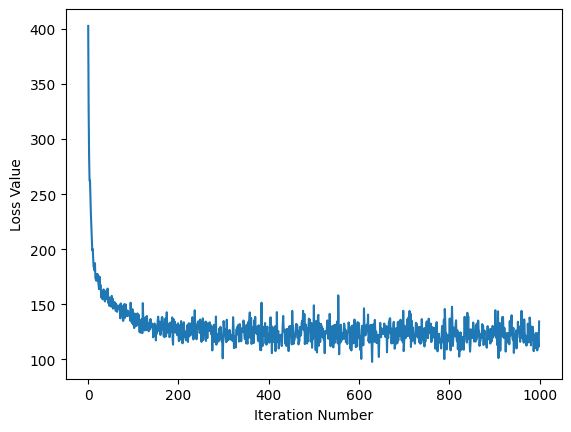

In [87]:
# Parameters
num_iters = 1000
batch_size = 256
num_labels = 1
num_features = X_train.shape[1]
learn_rate = 0.001
random_range = np.random.default_rng(len(X_train))
# index_offset = (np.linspace(0,batch_size-1,batch_size)*10).astype(int) # Offset translation from label to one-hot encoding


# Randomly initialize
W = np.random.randn(num_labels, num_features)
b = np.random.randn(num_labels)

# Preprocess the training data to fall between 0 and 1
# train_data = train_img / 255.0

# Iterate through num_iters
L = []
for i in range(num_iters):

  # Take a random training sample
  rand_sample = random_range.integers(low=0, high=891, size=batch_size)

  # Features
  xtrain_batch = X_train[rand_sample]

  # # Calculate the labels
  # ytrain_batch = np.zeros((batch_size, num_labels))
  ytrain_batch = y_train[rand_sample].values.reshape(-1, 1)
  # index_ones = index_offset + ytrain_label
  # ytrain_batch.reshape(batch_size*num_labels)[index_ones] = 1
  # What the above is doing in for loop
  # for i in range(batch_size):
  #   ytrain_batch[i, ytrain_label[i]] = 1

  # Calculate cost function and the gradient
  W -= learn_rate * gradW(ytrain_batch, W, xtrain_batch, b)
  b -= learn_rate * gradb(ytrain_batch, W, xtrain_batch, b)

  L.append(costfxn(ytrain_batch, W, xtrain_batch, b))

yhat = logreg(W, xtrain_batch, b)
plt.plot(L)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
print(f"Accuracy of Trained Model on Testing data: {accuracy_test:.2f}")
print(f"Accuracy of Trained Model on Training data: {accuracy_train:.2f}")

Using the Keras Toolbox

You can download this exact example code from the Tensorflow / Keras website, showing you how to run Keras, a deep neural network toolbox that is used in industry today. It's plug and play, and you can immediately use it.

In [101]:
# Create a neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(units=64, activation='relu', input_dim=num_features))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='sigmoid'))


# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()

batch_size = 128
epochs = 15


y_train_encoded = to_categorical(y_train, num_classes=4)
y_test_encoded = to_categorical(y_test, num_classes=4)
model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_encoded))
score = model.evaluate(X_test, y_test_encoded, verbose=0)

print("Final test loss:", score[0])
print("Final test accuracy:", score[1])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 64)                320       
                                                                 
 dense_98 (Dense)            (None, 32)                2080      
                                                                 
 dense_99 (Dense)            (None, 16)                528       
                                                                 
 dense_100 (Dense)           (None, 8)                 136       
                                                                 
 dense_101 (Dense)           (None, 4)                 36        
                                                                 
Total params: 3100 (12.11 KB)
Trainable params: 3100 (12.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
7/7 [===